# ph Classification

In [2]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle

In [3]:
df = LoadData(34).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image


,blue,green,red,label
112,75,192,67,7
370,199,47,83,13
91,36,103,242,1
131,164,78,90,12
347,40,196,132,5


In [4]:
df.describe()

,blue,green,red,label
count,504.000000,504.000000,504.000000,504.000000
mean,87.716270,129.013889,118.712302,7.057540
std,75.614046,73.372018,91.336653,4.285379
min,0.000000,0.000000,0.000000,0.000000
25%,20.750000,65.000000,44.500000,3.000000
50%,67.000000,144.500000,85.000000,7.000000
75%,160.000000,187.500000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 112 to 288
Data columns (total 4 columns):
blue     504 non-null int32
green    504 non-null int32
red      504 non-null int32
label    504 non-null int32
dtypes: int32(4)
memory usage: 11.8 KB


In [8]:
pd.value_counts(df['label']).sort_values()

0     29
13    33
14    34
12    34
11    34
10    34
9     34
8     34
7     34
6     34
5     34
4     34
3     34
2     34
1     34
Name: label, dtype: int64

In [10]:
df.isna().sum()

blue     0
green    0
red      0
label    0
dtype: int64

## Plotting

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

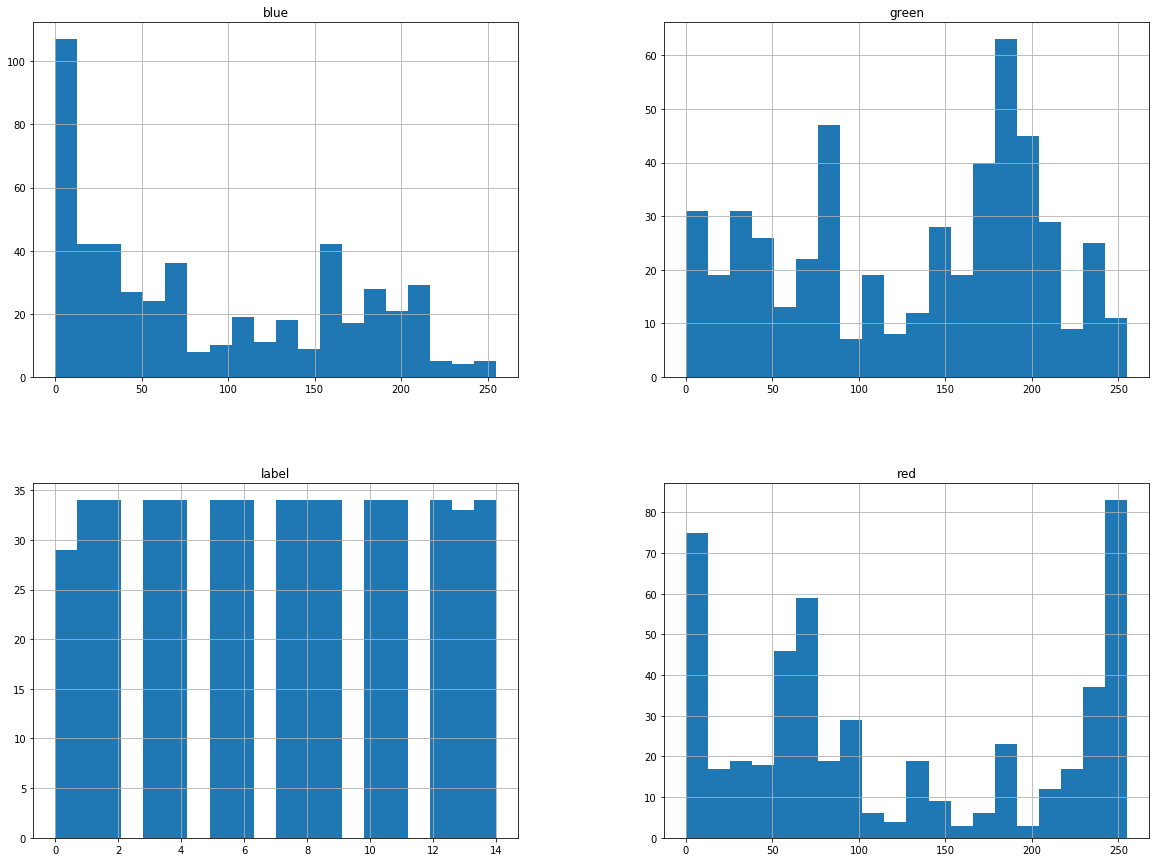

In [13]:
df.hist(bins=20, figsize=(20,15))
plt.show()

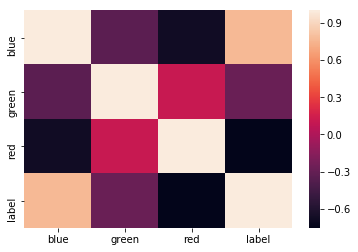

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

In [15]:
corr_matrix['label'].sort_values(ascending=False)

label    1.000000
blue     0.771511
green   -0.277708
red     -0.753045
Name: label, dtype: float64

## Split data

In [17]:
X = df.drop('label', axis=1)
y = df['label']
X.shape, y.shape

((504, 3), (504,))

In [18]:
from sklearn.preprocessing import StandardScaler
after_scalar_data = StandardScaler().fit_transform(X)
after_scalar_data

array([[-0.16834047,  0.85930157, -0.56673502],
       [ 1.4731958 , -1.11889212, -0.39138486],
       [-0.6846301 , -0.35490007,  1.35115734],
       ...,
       [ 1.28786106, -1.30989013, -0.73112579],
       [-0.49929536,  1.10487044,  0.67167548],
       [-0.64491552,  0.92751514,  0.13466562]])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((403, 3), (101, 3), (403,), (101,))

## Choose Model

### LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import classification_report
log_reg_predict = log_reg.predict(x_test)
x = [i for i in range(15)]
log_reg_result = classification_report(y_test, log_reg_predict,labels=x)
print(log_reg_result)

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         3
          1       1.00      0.50      0.67         6
          2       0.00      0.00      0.00         7
          3       0.43      0.60      0.50         5
          4       0.25      1.00      0.40         2
          5       0.83      0.71      0.77         7
          6       0.50      0.17      0.25         6
          7       1.00      0.50      0.67         8
          8       0.20      0.67      0.31         3
          9       1.00      0.78      0.88         9
         10       0.55      0.67      0.60         9
         11       0.44      0.80      0.57         5
         12       0.62      0.50      0.56        10
         13       0.40      0.18      0.25        11
         14       0.71      1.00      0.83        10

avg / total       0.61      0.56      0.55       101



### DecisionTreeClassfier

**without gridsearch**

In [25]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_class = DecisionTreeClassifier()
dec_tree_class.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
tree_predict = dec_tree_class.predict(x_test)
tree_result = classification_report(y_test, tree_predict,labels=x)
print(tree_result)

             precision    recall  f1-score   support

          0       0.50      0.67      0.57         3
          1       0.75      0.50      0.60         6
          2       0.75      0.86      0.80         7
          3       0.50      0.60      0.55         5
          4       1.00      1.00      1.00         2
          5       1.00      0.86      0.92         7
          6       0.67      0.67      0.67         6
          7       0.88      0.88      0.88         8
          8       0.40      0.67      0.50         3
          9       0.75      0.67      0.71         9
         10       0.67      0.44      0.53         9
         11       0.45      1.00      0.62         5
         12       0.75      0.60      0.67        10
         13       0.71      0.45      0.56        11
         14       0.75      0.90      0.82        10

avg / total       0.72      0.69      0.69       101



**with gridsearch**

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid_tree = [
    {'max_depth':[None,1,2,5,10],'criterion':['gini','entropy']},
    {'splitter':['best','random']}
]

In [32]:
tree_grid = GridSearchCV(dec_tree_class, param_grid_tree,scoring='accuracy')
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [None, 1, 2, 5, 10], 'criterion': ['gini', 'entropy']}, {'splitter': ['best', 'random']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': None}

### cross_val_score & cross_val_predict

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(dec_tree_class, x_train,y_train, cv=4, scoring='accuracy')

array([0.63207547, 0.66666667, 0.67676768, 0.6875    ])

In [43]:
from sklearn.model_selection import cross_val_predict
y_pred_tree = cross_val_predict(dec_tree_class, x_train, y_train, cv=3)

In [44]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_tree)

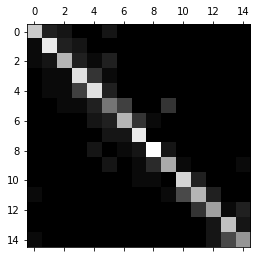

In [45]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

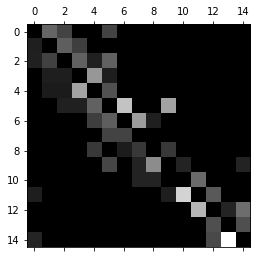

In [46]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

### GradientBoostingClassifier

**without randomgridsearch**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
grad_predict = grad_boost.predict(x_test)
grad_result = classification_report(y_test, grad_predict,labels=x)
print(grad_result)

             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       1.00      0.33      0.50         6
          2       0.86      0.86      0.86         7
          3       0.43      0.60      0.50         5
          4       0.67      1.00      0.80         2
          5       0.86      0.86      0.86         7
          6       0.80      0.67      0.73         6
          7       1.00      0.88      0.93         8
          8       0.67      0.67      0.67         3
          9       0.80      0.89      0.84         9
         10       0.67      0.67      0.67         9
         11       0.44      0.80      0.57         5
         12       1.00      0.70      0.82        10
         13       0.86      0.55      0.67        11
         14       0.77      1.00      0.87        10

avg / total       0.80      0.75      0.75       101



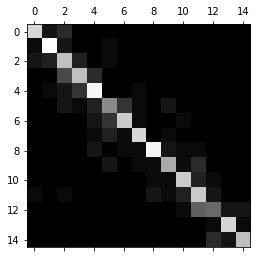

In [72]:
y_pred_grad = cross_val_predict(grad_boost, x_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_pred_grad)
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()